In [1]:
import pickle
from pathlib import Path
import os

# eeg analyses
import mne
# import ssvepy

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

from tqdm import tqdm as tqdm

# custom imports from local
from data.preprocessed import surround_suppression
from data import phenotypes

In [2]:
print(surround_suppression.n)

5


Creating RawArray with float64 data, n_channels=111, n_times=547952
    Range : 0 ... 547951 =      0.000 ...  1095.902 secs
Ready.
64 matching events found
0 projection items activated
Loading data for 64 events and 1501 original time points ...
0 bad epochs dropped
64 matching events found
0 bad epochs dropped
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but hasn't been applied yet. Use the .apply_proj() method function to apply projections.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Dropped 16 epochs


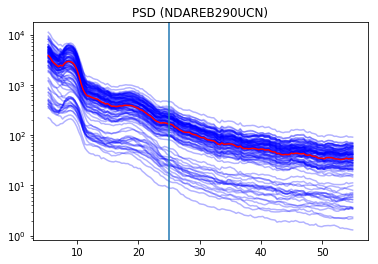

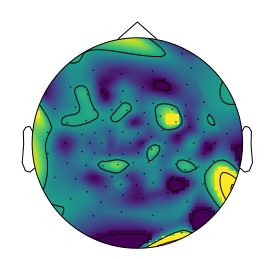

Creating RawArray with float64 data, n_channels=111, n_times=170634
    Range : 0 ... 170633 =      0.000 ...   341.266 secs
Ready.
64 matching events found
0 projection items activated
Creating RawArray with float64 data, n_channels=111, n_times=336421
    Range : 0 ... 336420 =      0.000 ...   672.840 secs
Ready.
64 matching events found
0 projection items activated
Loading data for 64 events and 1501 original time points ...
0 bad epochs dropped
Loading data for 64 events and 1501 original time points ...
0 bad epochs dropped
128 matching events found
0 bad epochs dropped
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but hasn't been applied yet. Use the .apply_proj() method function to apply projections.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Dropped 32 epochs


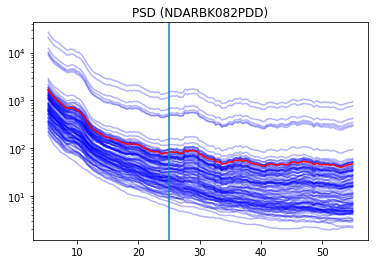

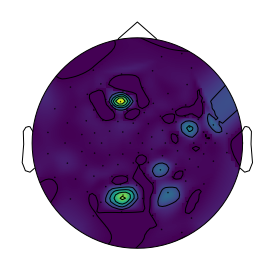

Creating RawArray with float64 data, n_channels=111, n_times=165088
    Range : 0 ... 165087 =      0.000 ...   330.174 secs
Ready.
64 matching events found
0 projection items activated
Creating RawArray with float64 data, n_channels=111, n_times=290676
    Range : 0 ... 290675 =      0.000 ...   581.350 secs
Ready.
64 matching events found
0 projection items activated
Loading data for 64 events and 1501 original time points ...
0 bad epochs dropped
Loading data for 64 events and 1501 original time points ...
0 bad epochs dropped
128 matching events found
0 bad epochs dropped
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but hasn't been applied yet. Use the .apply_proj() method function to apply projections.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Dropped 32 epochs


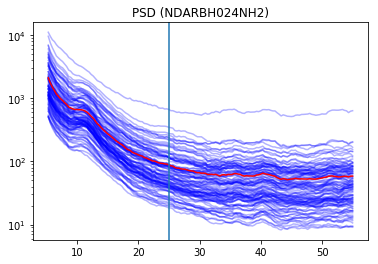

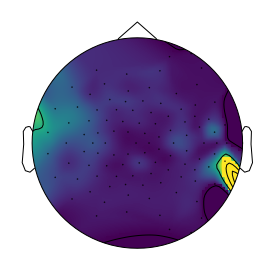

Creating RawArray with float64 data, n_channels=111, n_times=277795
    Range : 0 ... 277794 =      0.000 ...   555.588 secs
Ready.
64 matching events found
0 projection items activated
Loading data for 64 events and 1501 original time points ...
0 bad epochs dropped
64 matching events found
0 bad epochs dropped
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but hasn't been applied yet. Use the .apply_proj() method function to apply projections.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Dropped 16 epochs


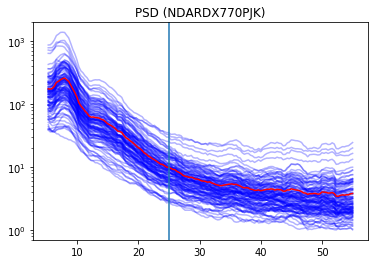

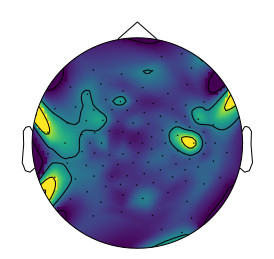

Creating RawArray with float64 data, n_channels=111, n_times=144564
    Range : 0 ... 144563 =      0.000 ...   289.126 secs
Ready.
64 matching events found
0 projection items activated
Creating RawArray with float64 data, n_channels=111, n_times=142313
    Range : 0 ... 142312 =      0.000 ...   284.624 secs
Ready.
64 matching events found
0 projection items activated
Loading data for 64 events and 1501 original time points ...
0 bad epochs dropped
Loading data for 64 events and 1501 original time points ...
0 bad epochs dropped
128 matching events found
0 bad epochs dropped
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but hasn't been applied yet. Use the .apply_proj() method function to apply projections.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Dropped 32 epochs


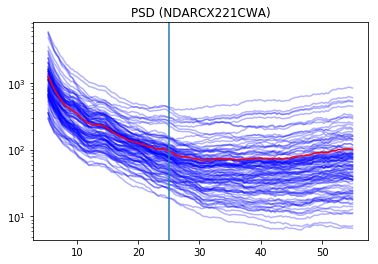

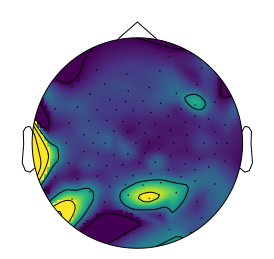

In [3]:
for epoch in surround_suppression.epochs():
    # re-ref to average
    epoch = epoch.set_eeg_reference()
    epoch = epoch.apply_proj()
    
    # only pick the epochs with the maximum signal
    # (codes 100 and 101)
    epoch = epoch.drop(epoch.events[:, 2] > 99)

    # take power-spectrum of this epoch
    psd, freq = mne.time_frequency.psd_multitaper(epoch, fmin=5, fmax=55, n_jobs=4)

    # plot the PSD
    plt.figure()
    plt.plot(freq, psd.mean(axis=0).T, color='blue', alpha=0.3)
    plt.plot(freq, psd.mean(axis=0).mean(axis=0), color='red')
    plt.yscale('log')
    plt.axvline(x=25)
    plt.title(f"PSD ({epoch.info['subject_info']})")
    # plt.savefig(f"reports/figures/{epoch.info['subject_info']}.png")
    plt.show()
    
    # plot the PSD of interest on the scalp
    pos = mne.channels.layout._auto_topomap_coords(epoch.info,
                                                   picks=mne.pick_types(epoch.info, eeg=True))
    mne.viz.plot_topomap(data=psd[:, :, (freq > 24) & (freq < 26)].mean(axis=0).mean(axis=-1),
                         pos=pos, cmap='viridis')
